In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0)

/Users/regi/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
tristates = [9, 34, 36]

In [6]:
df = df[df['_STATE'].isin(tristates)]

In [7]:
# or you can state it like this
# df[(df['_STATE'] == 9)|(df['_STATE'] == 24)|(df['_STATE'] == 36)]

Now check to see how large our subset df.

In [8]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [9]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [10]:
#your code here

zero_dict = {88:0, 77: np.nan, 99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [11]:
health_col = df['PHYSHLTH']

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [12]:
# descriptive statistics
stats = health_col.describe()
stats

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

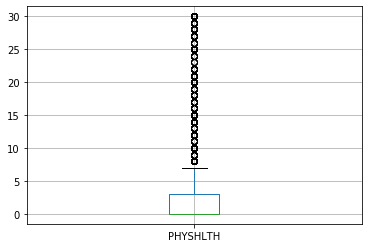

In [13]:
# graphic showing those descriptive stats
pd.DataFrame(health_col).boxplot()

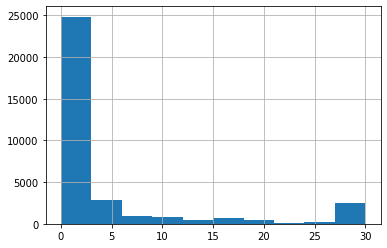

In [14]:
# graphic showing the distribution of data
health_col.hist()

<font color=pink>
Class notes: 
</font>

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [15]:
# code to calculate the average number of sick days by state
mean_sick = pd.DataFrame(df.groupby('_STATE')['PHYSHLTH'].mean())


In [16]:
pd.DataFrame(df[['_STATE','PHYSHLTH']])

,_STATE,PHYSHLTH
49938,9.0,0.0
49939,9.0,0.0
49940,9.0,2.0
49941,9.0,0.0
49942,9.0,0.0
49943,9.0,0.0
49944,9.0,0.0
49945,9.0,0.0
49946,9.0,28.0
49947,9.0,0.0


In [19]:
plot_df = pd.DataFrame(mean_sick).reset_index()
plot_df

,_STATE,PHYSHLTH
0,9.0,3.688562
1,34.0,4.380957
2,36.0,4.148030


In [20]:
# y = list(plot_df['_STATE'])
y = list(plot_df['PHYSHLTH'])
x = ['CT', 'NJ', 'NY']

In [21]:
# bins = {9.0:'CT', 34.0:'NJ',36.0:'NY'}

<BarContainer object of 3 artists>

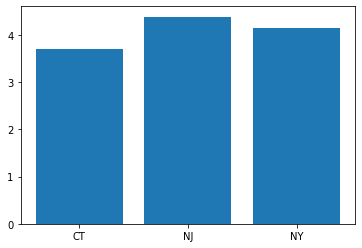

In [22]:
# code to graph those averages using matplotlib
plt.bar(x, y)

<font color=pink>
The hsitogram he shows with 3 states is not the best type but just an example
</font>

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [23]:
# code to create new colum for chronically sick
#defined cronically sick as more than 20 days
# df['CHRONIC'] =  
df.loc[df['PHYSHLTH'] >= 20, 'CHRONIC'] = True
df.loc[df['PHYSHLTH'] < 20, 'CHRONIC'] = False
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,CHRONIC
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,False
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,False
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,False
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,False
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,False


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [24]:
# code to calculate averages per state
df["CHRONIC"].count()

33747

In [25]:
df.shape

(34545, 359)

In [26]:
df["CHRONIC"].value_counts()

False    30534
True      3213
Name: CHRONIC, dtype: int64

In [27]:
# create graphic to compare chronically sick by state
sick = df.groupby(['_STATE', 'CHRONIC']).agg({'CHRONIC':'count'})
sick

CHRONIC
_STATE CHRONIC         
9.0    False       9534
       True         879
34.0   False      10241
       True        1217
36.0   False      10759
       True        1117

In [28]:
df.groupby('_STATE').agg({'CHRONIC':mean})

NameError: name 'mean' is not defined

In [401]:
df.groupby('_STATE').mean()

DataError: No numeric types to aggregate

In [405]:
df['CHRONIC'].mean()

0.09520846297448662

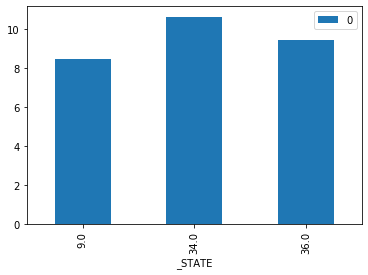

In [403]:
sick_pcts = sick.groupby(level=0).apply(lambda x: 100* x / float(x.sum()))
chartt = sick_pcts.unstack().unstack().reset_index()[3:]
sick_plot = chartt.drop(columns=['level_0','CHRONIC']).set_index('_STATE')
sick_plot.plot.bar()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [250]:
# SMOKDAY2
# 1 - Everyday
# 2 - Some days
# 3 - not at all
# 7 - dont know 
# 9 - refused 
# NaN - missing 
# First lets check if any of the NaN values have other columns values 
# OTher related columns are
#                           USENOW3 - other tabacoo products (1 - everyday
#                                                             2 - some days)
#                           ECIGNOW - e-cigarettes ( 1 -everyday
#                                                    2 - some days)
                       
    

In [ ]:
# df.loc[df['PHYSHLTH'] >= 20, 'CHRONIC'] = True

In [315]:
df_save = df.copy()

In [318]:
# df.loc[df['SMOKDAY2'].isna(), 'MISS_SMK'] = 'missing'
# df['MISS_SMK2'] = [df['SMOKDAY2'].isna()]

In [327]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,CHRONIC,MISS_SMK
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,False,missing
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,False,missing
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,False,missing
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,False,missing
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,False,NaN


In [389]:
# First condition : People who who have missing values for SMOKDAY2 but smoke e-cigarettes  all the time or some time
# Second condition: People who refused, dont know or dont smoke for SMOKDAY2 but smoke e-cigarettes all the time or some time
# Third condition: People who who have missing values for SMOKDAY2 but use other tabacco products all the time or some time
# Fourth condition: People who refused, dont know or dont smoke for SMOKDAY2 but use other tabacco products all the time or some time
# Fifth condition: People who smoke some days or every day
# Sixth condition: People who do not smoke
condition = [
            ((df['SMOKDAY2'].isnull()) & (df['ECIGNOW'] == 1 | 2)), 
            ((df['SMOKDAY2'] == 7 | 9) & (df['ECIGNOW'] == 1 | 2)),
            ((df['SMOKDAY2'].isnull()) & (df['USENOW3'] == 1 | 2)),
            ((df['SMOKDAY2'] == 7 | 9) & (df['USENOW3'] == 1 | 2)),
            (df['SMOKDAY2'] == 1 | 2),
            (df['SMOKDAY2'] == 3)
            ]
choice = ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
# Mark those people as 'Yes' in column smoker
df['SMOKER'] = np.select(condition, choice, default = 'NA')

In [395]:
df['SMOKER2'] = np.select(condition, choice, default = 'NA')

In [ ]:
df

In [ ]:
smoker = np.where(df['ECIGNOW']isin([1,2]), 1, df['SMOKDAY2'] )

In [346]:
# # Find people who who have missing values for SMOKDAY2 but smoke e-cigarettes  all the time or some time
# condition = [(df['SMOKDAY2'].isnull()) & (df['ECIGNOW'] == 1 | 2)]
# choice = ['Yes']
# # Mark those people as 'Yes' in column smokerx
# df['SMOKER'] = np.select(condition, choice, default = 'NA')

In [ ]:
# condition = [(df['SMOKDAY2'].isnull()) & (df['ECIGNOW'] == 1 | 2)]
# choice = ['Yes']
# df['SMOKER'] = np.select(condition, choice, default = 'NA')

In [396]:
df.loc[df['SMOKDAY2'] == 3, ['SMOKDAY2', 'SMOKER2']]

,SMOKDAY2,SMOKER2
49942,3.0,Yes
49944,3.0,Yes
49946,3.0,Yes
49951,3.0,Yes
49954,3.0,Yes
49956,3.0,Yes
49964,3.0,Yes
49965,3.0,Yes
49966,3.0,Yes
49968,3.0,Yes


In [380]:
df['SMOKER'].value_counts(dropna=False)

Yes    28712
NA      5833
Name: SMOKER, dtype: int64

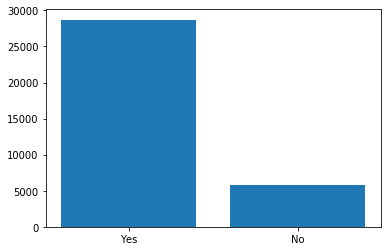

In [376]:
bar_heights = [28712, 5833]
bar_labels = ['Yes', 'NA']
bar_x_positions = [2, 3]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.bar(bar_x_positions, bar_heights)
plt.xticks(bar_x_positions, bar_labels)
plt.title('Smokers vs Non-smokers')
plt.show()

In [357]:
df.loc[(df['SMOKDAY2'] == 7 | 9) & (df['STOPSMK2'].isnull())]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,CHRONIC,MISS_SMK,SMOKER


In [345]:
df['SMOKER'] = np.where((df.loc[(df['SMOKDAY2'].isnull()) & (df['ECIGNOW'] == 1 | 2)]), True, False) 

ValueError: Length of values does not match length of index

In [388]:
df['SMOKER'].value_counts()

Yes    28712
No      5833
Name: SMOKER, dtype: int64

In [332]:
df['USENOW3'].value_counts()

3.0    32392
2.0      317
1.0      214
9.0       97
7.0       27
Name: USENOW3, dtype: int64

In [280]:
df.loc[['SMOKDAY2'].isnull(), 'USENOW3']

AttributeError: 'list' object has no attribute 'isnull'

In [251]:
df['SMOKDAY2'].value_counts(dropna=False)

NaN    20762
3.0     9703
1.0     2676
2.0     1371
9.0       27
7.0        6
Name: SMOKDAY2, dtype: int64

In [303]:
df.shape

(34545, 359)

In [246]:
pd.DataFrame(df.groupby(['SMOKDAY2', 'CHRONIC'])).unstack()

0  0                                         (1.0, False)
   1                                          (1.0, True)
   2                                         (2.0, False)
   3                                          (2.0, True)
   4                                         (3.0, False)
   5                                          (3.0, True)
   6                                         (7.0, False)
   7                                         (9.0, False)
   8                                          (9.0, True)
1  0            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   1            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   2            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   3            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   4            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   5            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   6            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   7            _STATE  FMONTH     IDATE  IMONTH  IDAY...
   8          

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  